### Plot HRU at different complexity levels ###

In [1]:
import os, sys
import numpy as np
import rasterio as rio
import geopandas as gpd
sys.path.append('../')
import functions.utils as ut
import functions.geospatial_plot as gp
sys.path.append('/glade/work/eriddle/python_eriddle/lib/python2.7/site-packages/')
import descartes     # needed if using 'patches'

In [2]:
# common paths
control_file    = '../../control/control.txt.06282000'
basin_name      = ut.read_from_control(control_file, 'basin_name')
basin_data_path = ut.read_from_control(control_file, 'basin_data_path')
plot_path       = os.path.join(basin_data_path, 'plots/')
gis_path        = os.path.join(basin_data_path, 'gis/')
results_path    = os.path.join(basin_data_path, 'results/')

In [3]:
# set basin shapefiles
basin_gru_shp             = ut.set_filename(control_file, 'basin_gru_shp')  # may exist
basin_flowlines_shp       = ut.set_filename(control_file, 'basin_flowlines_shp') # may exist; is always _prj
basin_dem_raster          = ut.set_filename(control_file, 'basin_dem_raster')  

# huc fieldname and text file
gruNo_fieldname           = ut.read_from_control(control_file, 'gruNo_fieldname')
elev_class_fieldname      = ut.read_from_control(control_file,'elev_class_fieldname')           # field name of the elevation class column in HRU. 
land_class_fieldname      = ut.read_from_control(control_file,'land_class_fieldname')           # field name of the land class column in HRU. 
radiation_class_fieldname = ut.read_from_control(control_file,'radiation_class_fieldname') # field name of the radiation class column in HRU. 

# derived filenames
basin_gru_prj_shp         = basin_gru_shp.split('.shp')[0]+'_prj.shp'

#### Define HRU complexity levels ####
level 0: GRU = HRU. <br>
level 1a: use only elevation bands in HRU generation.<br>
level 1b: use only canopy class in HRU generation.<br>
level 1c: use only radiation class in HRU generation.<br>
level 2a: use elevation bands and canopy class in HRU generation.<br>
level 2b: use elevation bands and radiation class in HRU generation.<br>
level 2c: use canopy class and radiation class in HRU generation.<br>
level 3: use elevation bands, radiation class, canopy class in HRU generation.<br>

In [4]:
level_list = ['0','1a','1b','1c','2a','2b','2c','3']

#### Plot HRU ####

--- Complexity level 0 ---


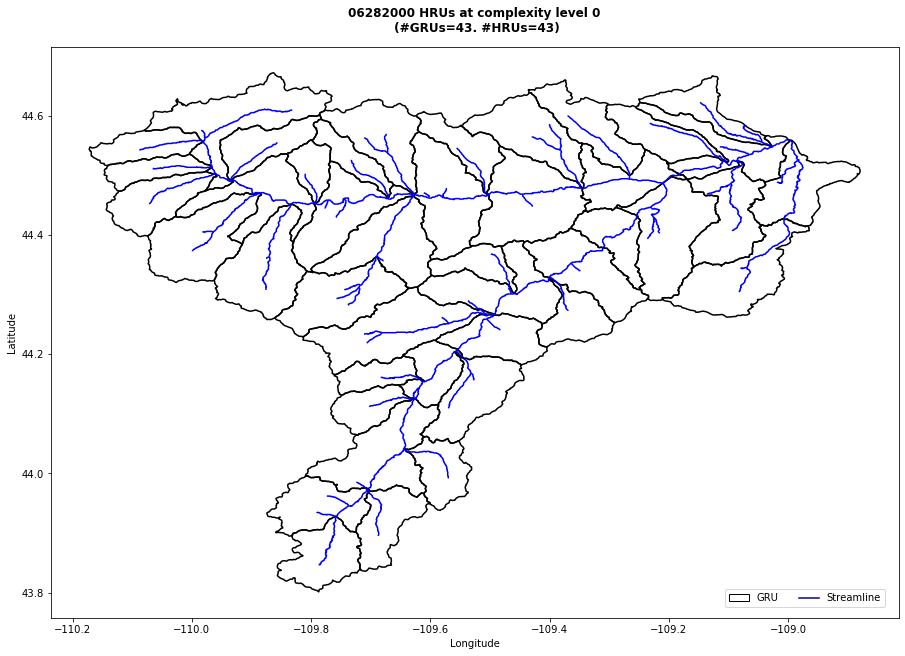

--- Complexity level 1a ---


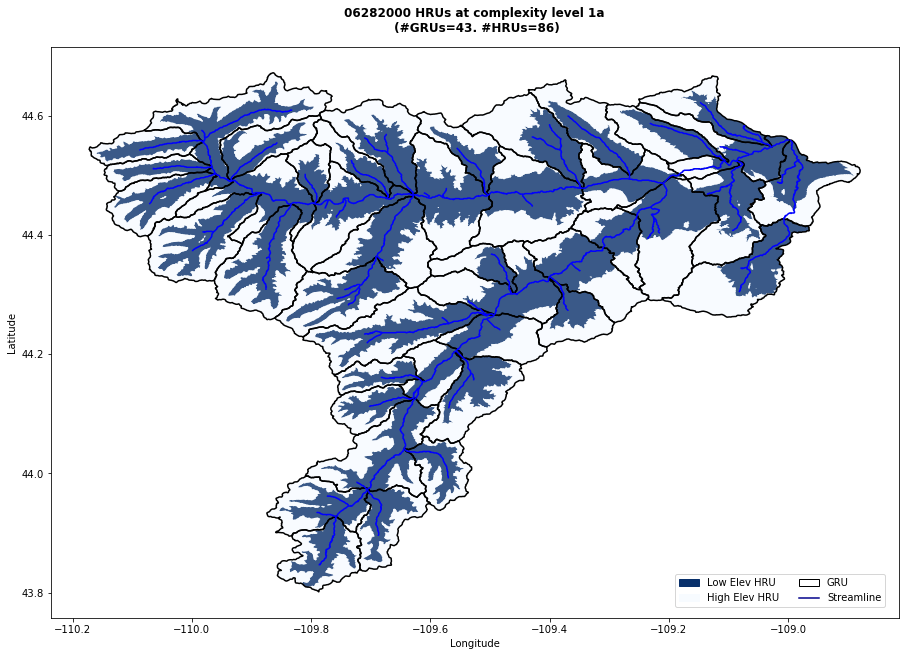

--- Complexity level 1b ---


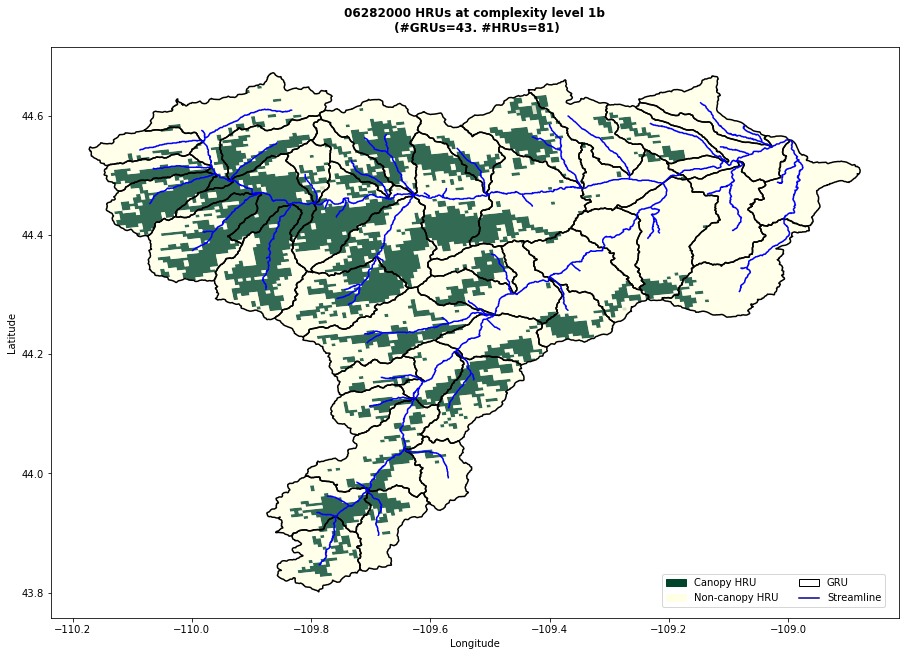

--- Complexity level 1c ---


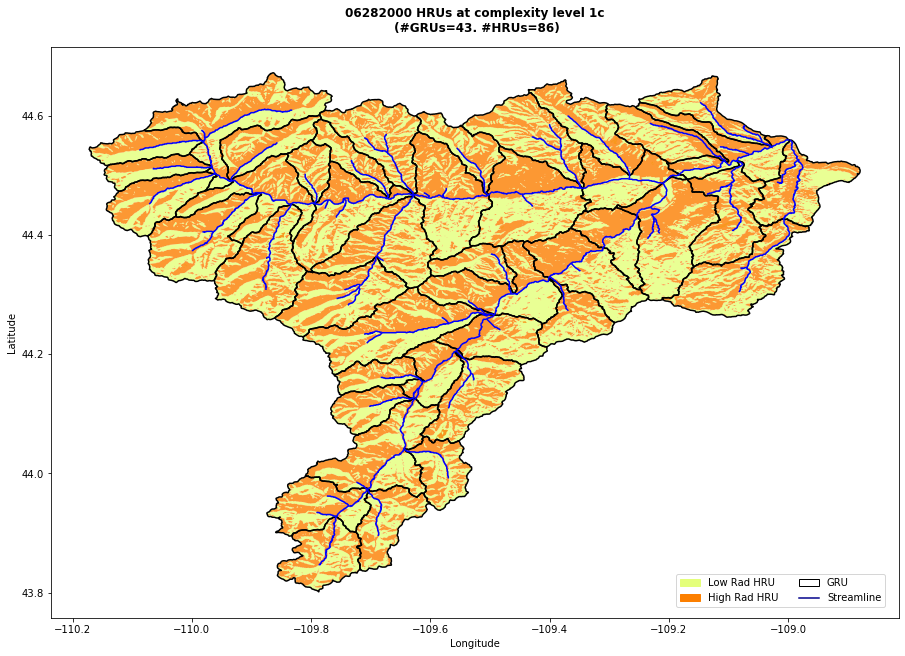

--- Complexity level 2a ---


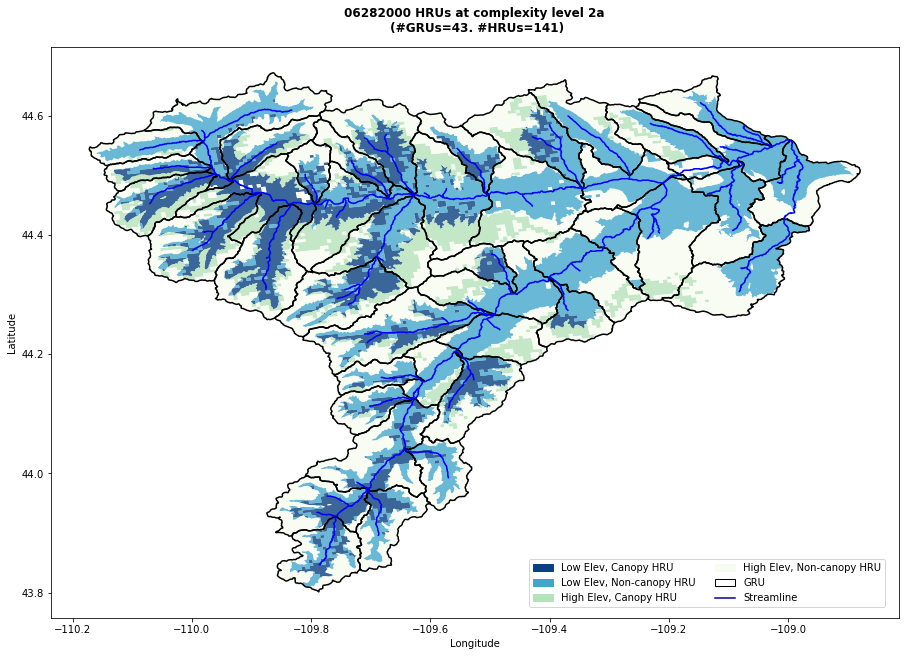

--- Complexity level 2b ---


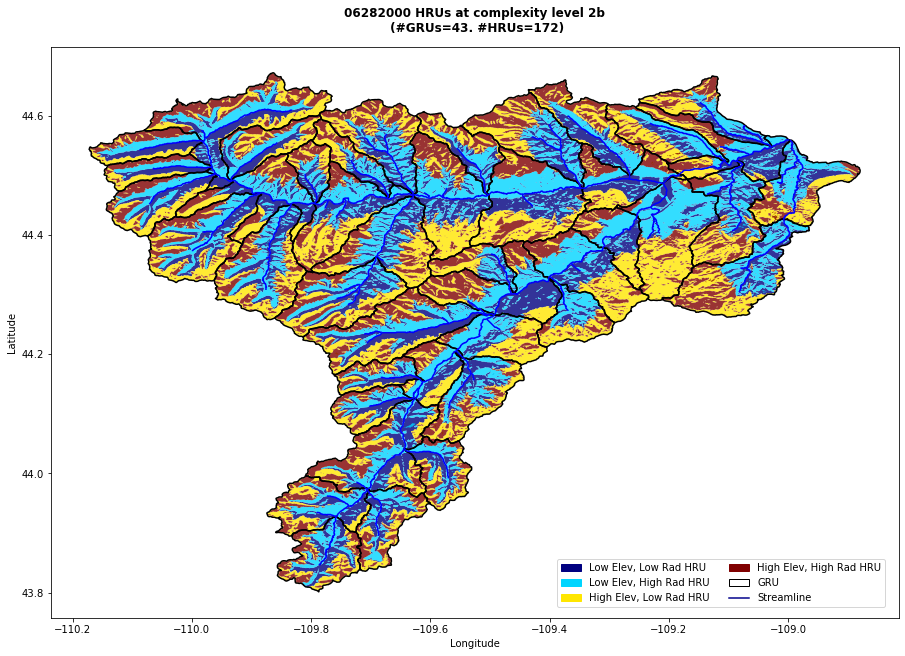

--- Complexity level 2c ---


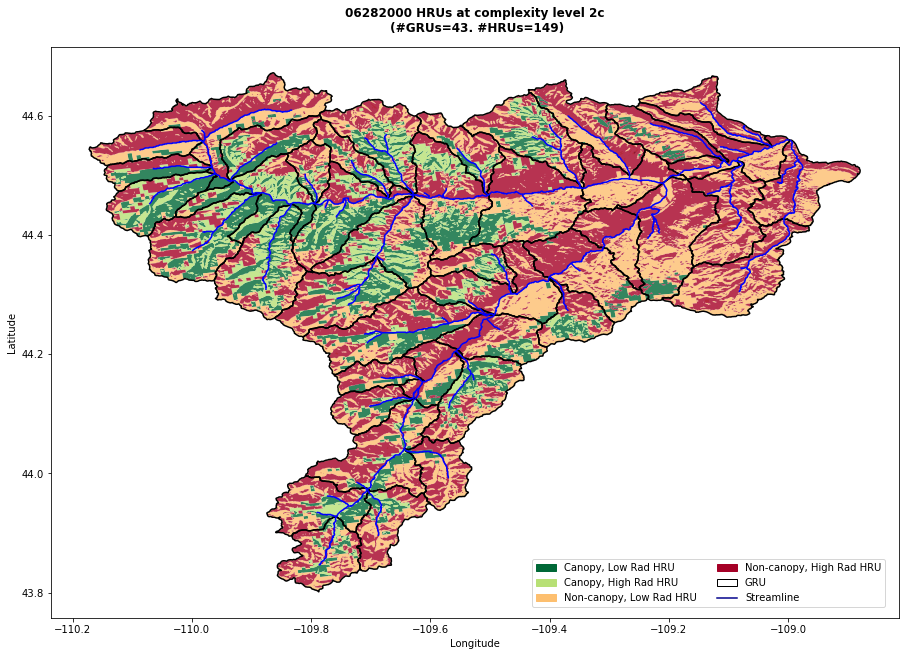

--- Complexity level 3 ---


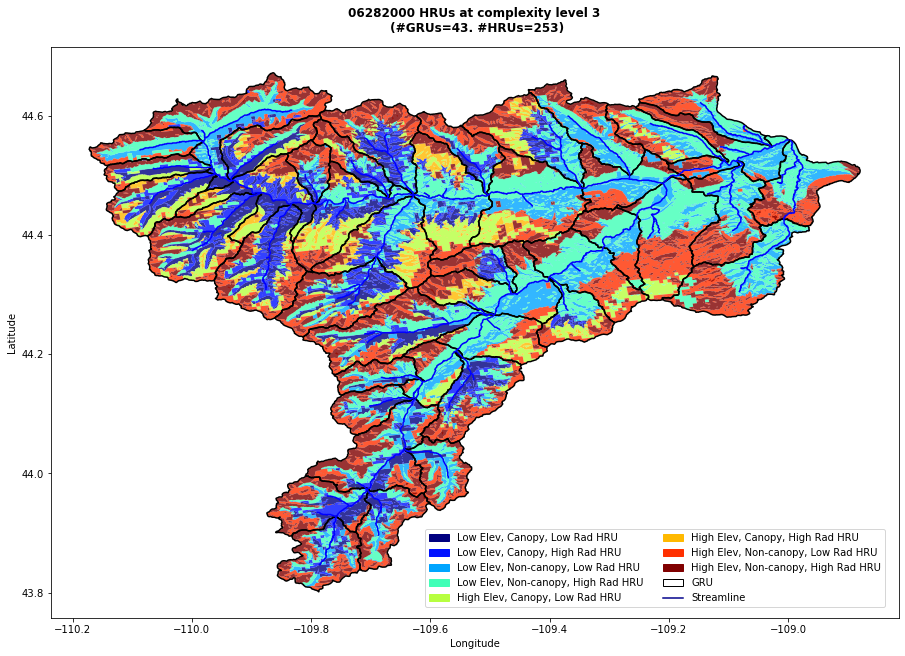

In [6]:
# plot settings
figsize             = (10, 10*0.6)
title               = basin_name.capitalize() + ' HRUs'
leg_ncol            = 2
#leg_loc            = 'lower right'    # customize to location of basin in figure
#leg_bbox_to_anchor = (0.99, 0.01)
leg_loc             = 'upper center'
leg_bbox_to_anchor  = (0.5, -0.1)
wgs_epsg            = 4326          # projection used for plot

# loop over levels, make one plot for each
for level in level_list:

    print('--- Complexity level %s ---' %(level))

    # specification plot inputs / outputs
    hru_str         = 'hru_lev' + str(level)
    hru_elmn_str    = hru_str+'_elmn'     
    hru_vector      = os.path.join(results_path, hru_str+'.shp')
    hru_vector_elmn = os.path.join(results_path, hru_elmn_str+'.shp')    
    ofile           = os.path.join(plot_path, hru_str+'.png')   
    ofile_elmn      = os.path.join(plot_path, hru_elmn_str+'.png')      
       
    # fieldname_list: a list of field names corresponding to the inputs that are used to define HRU (except GRU input).
    # input_dict:     a dictionary defining each hru_type corresponding plot color and label. 
    # When cmap_str is 'user', input_dict follows the format: dict[hru_type]=list(color,label). 
    # For example, input_dict = {1:["black", "Low Elev HRU"], 2:["white", "High Elev HRU"]}.     
    # When cmap_str is a Python built-in colormap (eg, 'jet'), input_dict follows the format: dict[hru_type]=label. 
    # For example, input_dict = {1: "Low Elev HRU", 2: 'High Elev HRU'}.   

    if level == '0':
        fieldname_list = [] 
        input_dict = []
        cmap_str='jet'        
    elif level == '1a':
        fieldname_list = [elev_class_fieldname] 
        input_dict={'1': "Low Elev HRU",
                    '2': "High Elev HRU"} 
        cmap_str='Blues_r'
    elif level == '1b':
        fieldname_list = [land_class_fieldname] 
        input_dict={'1': "Canopy HRU",
                    '2': "Non-canopy HRU"} 
        cmap_str='YlGn_r'
    elif level == '1c':
        fieldname_list = [radiation_class_fieldname] 
        input_dict={'1': "Low Rad HRU",
                    '2': "High Rad HRU"} 
        cmap_str='Wistia'
    elif level == '2a':
        fieldname_list = [elev_class_fieldname, land_class_fieldname] 
        input_dict={'11': "Low Elev, Canopy HRU",
                    '12': "Low Elev, Non-canopy HRU",
                    '21': 'High Elev, Canopy HRU',
                    '22': 'High Elev, Non-canopy HRU'} 
        cmap_str='GnBu_r'
    elif level == '2b':
        fieldname_list = [elev_class_fieldname, radiation_class_fieldname] 
        input_dict={'11': "Low Elev, Low Rad HRU",
                    '12': "Low Elev, High Rad HRU",
                    '21': 'High Elev, Low Rad HRU',
                    '22': 'High Elev, High Rad HRU'} 
        cmap_str='jet'        
    elif level == '2c':
        fieldname_list = [land_class_fieldname, radiation_class_fieldname] 
        input_dict={'11': "Canopy, Low Rad HRU",
                    '12': "Canopy, High Rad HRU",
                    '21': 'Non-canopy, Low Rad HRU',
                    '22': 'Non-canopy, High Rad HRU'}
        cmap_str='RdYlGn_r'        
    elif level == '3':
        fieldname_list = [elev_class_fieldname, land_class_fieldname, radiation_class_fieldname] 
        input_dict={'111': "Low Elev, Canopy, Low Rad HRU",
                    '112': "Low Elev, Canopy, High Rad HRU",
                    '121': "Low Elev, Non-canopy, Low Rad HRU",
                    '122': "Low Elev, Non-canopy, High Rad HRU",
                    '211': 'High Elev, Canopy, Low Rad HRU',
                    '212': 'High Elev, Canopy, High Rad HRU',
                    '221': 'High Elev, Non-canopy, Low Rad HRU',
                    '222': 'High Elev, Non-canopy, High Rad HRU'} 
        cmap_str='jet'        
  
    # plot
    gp.plot_hru(level, hru_vector_elmn, basin_gru_prj_shp, basin_flowlines_shp, wgs_epsg, fieldname_list, cmap_str, input_dict, figsize, title, leg_loc, leg_bbox_to_anchor, leg_ncol,ofile)